# Bounding box based classifications

## Project

In [6]:
# %matplotlib inline
from __future__ import division
# # import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import numpy as np
np.random.seed(2016)

import os
import glob
import cv2
import datetime
import pandas as pd
import time
import warnings
warnings.filterwarnings("ignore")
import types    

from keras.models import load_model
from sklearn.cross_validation import KFold
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from sklearn.metrics import log_loss
from keras import __version__ as keras_version
from keras import regularizers
from keras.layers import Dense, Dropout, Activation
from keras.layers.advanced_activations import LeakyReLU,PReLU
from sklearn.externals import joblib
from sklearn.metrics import average_precision_score,accuracy_score,recall_score,precision_score
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import collections
import pdb

from sklearn.metrics import log_loss,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn import linear_model,decomposition
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from sklearn.model_selection import StratifiedKFold
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from scipy import interp
import scipy
import pickle

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,SGDClassifier
from sklearn.linear_model import RidgeCV
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, ShuffleSplit

from scipy.sparse import coo_matrix, hstack ,vstack

import gc

print(gc.collect())

import xgboost as xgb
from keras import applications
import os


# deep models
from keras.layers import Input
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


import copy
import datetime
import json
import multiprocessing as mltproc

from PIL import Image, ImageDraw, ImageFont
import time


0


In [7]:
ResNet50.name='ResNet50'
VGG16.name='VGG16'
VGG19.name='VGG19'
InceptionV3.name='InceptionV3'

In [75]:
Listallimages=[]
ALB_path='inputdata/train/ALB'
BET_path='inputdata/train/BET'
DOL_path='inputdata/train/DOL'
LAG_path='inputdata/train/LAG'
SHARK_path='inputdata/train/SHARK'
YFT_path='inputdata/train/YFT'
NoF_path = 'inputdata/train/NoF'
OTHER_path = 'inputdata/train/OTHER'


images=os.listdir(ALB_path)
ALB_images=[os.path.join('inputdata/train/ALB',ff) for ff in images if '.jpg' in ff ]


images=os.listdir(BET_path)
BET_images=[os.path.join('inputdata/train/BET',ff) for ff in images if '.jpg' in ff ]

images=os.listdir(DOL_path)
DOL_images=[os.path.join('inputdata/train/DOL',ff) for ff in images if '.jpg' in ff ]

images=os.listdir(LAG_path)
LAG_images=[os.path.join('inputdata/train/LAG',ff) for ff in images if '.jpg' in ff ]

images=os.listdir(SHARK_path)
SHARK_images=[os.path.join('inputdata/train/SHARK',ff) for ff in images if '.jpg' in ff ]

images=os.listdir(YFT_path)
YFT_images=[os.path.join('inputdata/train/YFT',ff) for ff in images if '.jpg' in ff ]

images=os.listdir(NoF_path)
NoF_images=[os.path.join('inputdata/train/NoF',ff) for ff in images if '.jpg' in ff ]

images=os.listdir(OTHER_path)
OTHER_images=[os.path.join('inputdata/train/OTHER',ff) for ff in images if '.jpg' in ff ]

Allimages={'ALB': ALB_images,
           'BET': BET_images,
           'DOL': DOL_images,
           'LAG': LAG_images,
           'SHARK': SHARK_images,
           'YFT': YFT_images,
           'NoF': NoF_images,
           'OTHER': OTHER_images}



# Now getting all the test data
testimages=[os.path.join('inputdata/test_stg1',ff) for ff in os.listdir('inputdata/test_stg1') if '.jpg' in ff ]+ \
            [os.path.join('inputdata/test_stg2',ff) for ff in os.listdir('inputdata/test_stg2') if '.jpg' in ff ]


    
# getting cropped images
ALB_cropped_path='inputdata/train/ALB/cropped'
BET_cropped_path='inputdata/train/BET/cropped'
DOL_cropped_path='inputdata/train/DOL/cropped'
LAG_cropped_path='inputdata/train/LAG/cropped'
SHARK_cropped_path='inputdata/train/SHARK/cropped'
YFT_cropped_path='inputdata/train/YFT/cropped'
NoF_cropped_path = 'inputdata/train/NoF/cropped'
OTHER_cropped_path = 'inputdata/train/OTHER/cropped'

images=os.listdir(ALB_cropped_path)
ALB_cropped_images=[os.path.join(ALB_cropped_path,ff) for ff in images if '.jpg' in ff ]

images=os.listdir(BET_cropped_path)
BET_cropped_images=[os.path.join(BET_cropped_path,ff) for ff in images if '.jpg' in ff ]

images=os.listdir(DOL_cropped_path)
DOL_cropped_images=[os.path.join(DOL_cropped_path,ff) for ff in images if '.jpg' in ff ]

images=os.listdir(LAG_cropped_path)
LAG_cropped_images=[os.path.join(LAG_cropped_path,ff) for ff in images if '.jpg' in ff ]

images=os.listdir(SHARK_cropped_path)
SHARK_cropped_images=[os.path.join(SHARK_cropped_path,ff) for ff in images if '.jpg' in ff ]

images=os.listdir(YFT_cropped_path)
YFT_cropped_images=[os.path.join(YFT_cropped_path,ff) for ff in images if '.jpg' in ff ]

images=os.listdir(NoF_cropped_path)
NoF_cropped_images=[os.path.join(NoF_cropped_path,ff) for ff in images if '.jpg' in ff ]

images=os.listdir(OTHER_cropped_path)
OTHER_cropped_images=[os.path.join(OTHER_cropped_path,ff) for ff in images if '.jpg' in ff ]

Allimages_cropped={'ALB': ALB_cropped_images,
           'BET': BET_cropped_images,
           'DOL': DOL_cropped_images,
           'LAG': LAG_cropped_images,
           'SHARK': SHARK_cropped_images,
           'YFT': YFT_cropped_images,
           'NoF': NoF_cropped_images,
           'OTHER': OTHER_cropped_images}

fishes=Allimages.keys()
All_bboxes={}
for fish in fishes:
    All_bboxes[fish]=[]
    with open('boundingbox_'+fish+'.json','r') as ff:
        bboxes=json.load(ff)
    for img in Allimages[fish]:
        imagename=img.split('/')[-1]
        if imagename in bboxes.keys():
            All_bboxes[fish].append(bboxes[imagename])
        else:
            All_bboxes[fish].append([])
            
# now get the original sizes of images

In [77]:
print len(All_bboxes['BET'])
print len(Allimages['BET'])

200
200


In [9]:
# Extract feature and train on different models
featureExtractors=[
                     {'name':'ResNet50','model':ResNet50(weights='imagenet')},
                     {'name':'VGG16','model':VGG16(weights='imagenet', include_top=True)},
#                      {'name':'VGG19','model':VGG19(weights='imagenet', include_top=True)},
#                      {'name':'InceptionV3','model':InceptionV3(input_tensor=Input(shape=(224, 224, 3)) ,weights='imagenet', include_top=True)}
                    ]

In [10]:
# All the Neural Network models to be run
class NNmodels(object):
    def __init__(self):
        self.batch_size = 500
        self.nb_epoch = 100
        self.random_state = 51
        self.listofmodels=['NNLinear-1h-500','NNSigmoid-1h-500','NNtanh-1h-500','NNRelu-1h-500','NNLeakyRelu-1h-500']
        self.input_dim=None
        
    def __iter__(self):
        i=0
        # Single Layer
        for l2reg in [0]:
            for N1layer in [50,500]:
                for dropout in np.arange(0,1,0.2):
                    i=i+1
#                     if i>5:
#                         raise StopIteration
                        
                    #----------------------------------------
                    model = Sequential()
                    model.add(Dense(output_dim=N1layer, input_dim=self.input_dim,kernel_regularizer=regularizers.l2(l2reg),))
                    model.add(Activation("linear"))
                    model.add(Dropout(dropout))

                    model.add(Dense(output_dim=8))
                    model.add(Activation("softmax"))

                    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.3, nesterov=True)
                    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
                    
                    name='NNlinear_%d_%02.4f_%02.4f'%(N1layer,l2reg,dropout)
                    
                    yield (name,[N1layer,l2reg,dropout,'linear'],model)
                    
                    #----------------------------------------
                    model = Sequential()
                    model.add(Dense(output_dim=N1layer, input_dim=self.input_dim,kernel_regularizer=regularizers.l2(l2reg),))
                    model.add(Activation("sigmoid"))
                    model.add(Dropout(dropout))

                    model.add(Dense(output_dim=8))
                    model.add(Activation("softmax"))

                    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.3, nesterov=True)
                    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
                    
                    name='NNsigmoid_%d_%02.4f_%02.4f'%(N1layer,l2reg,dropout)
                    
                    yield (name,[N1layer,l2reg,dropout,'sigmoid'],model)
                    
                    #----------------------------------------
                    model = Sequential()
                    model.add(Dense(output_dim=N1layer, input_dim=self.input_dim,kernel_regularizer=regularizers.l2(l2reg),))
                    model.add(Activation("tanh"))
                    model.add(Dropout(dropout))

                    model.add(Dense(output_dim=8))
                    model.add(Activation("softmax"))

                    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.3, nesterov=True)
                    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
                    
                    name='NNtanh_%d_%02.4f_%02.4f'%(N1layer,l2reg,dropout)
                    
                    yield (name,[N1layer,l2reg,dropout,'tanh'],model)
                    
                    #----------------------------------------
                    model = Sequential()
                    model.add(Dense(output_dim=N1layer, input_dim=self.input_dim,kernel_regularizer=regularizers.l2(l2reg),))
                    model.add(Activation("relu"))
                    model.add(Dropout(dropout))

                    model.add(Dense(output_dim=8))
                    model.add(Activation("softmax"))

                    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.3, nesterov=True)
                    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
                    
                    name='NNrelu_%d_%02.4f_%02.4f'%(N1layer,l2reg,dropout)
                    
                    yield (name,[N1layer,l2reg,dropout,'relu'],model)
                    
                    #----------------------------------------
                    model = Sequential()
                    model.add(Dense(output_dim=N1layer, input_dim=self.input_dim,kernel_regularizer=regularizers.l2(l2reg),))
                    model.add(LeakyReLU(alpha = 0.1))
                    model.add(Dropout(dropout))

                    model.add(Dense(output_dim=8))
                    model.add(Activation("softmax"))

                    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.3, nesterov=True)
                    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
                    
                    name='NNLeakyReLU_%d_%02.4f_%02.4f'%(N1layer,l2reg,dropout)
                    
                    yield (name,[N1layer,l2reg,dropout,'LeakyReLU'],model)
        
        
        # Single Layer
        for l2reg in np.linspace(0,0.1,5):
            for N1layer in [50,500]:
                for dropout in [0]:
                    i=i+1
#                     if i>5:
#                         raise StopIteration
                        
                    #----------------------------------------
                    model = Sequential()
                    model.add(Dense(output_dim=N1layer, input_dim=self.input_dim,kernel_regularizer=regularizers.l2(l2reg),))
                    model.add(Activation("linear"))
                    model.add(Dropout(dropout))

                    model.add(Dense(output_dim=8))
                    model.add(Activation("softmax"))

                    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.3, nesterov=True)
                    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
                    
                    name='NNlinear_%d_%02.4f_%02.4f'%(N1layer,l2reg,dropout)
                    
                    yield (name,[N1layer,l2reg,dropout,'linear'],model)
                    
                    #----------------------------------------
                    model = Sequential()
                    model.add(Dense(output_dim=N1layer, input_dim=self.input_dim,kernel_regularizer=regularizers.l2(l2reg),))
                    model.add(Activation("sigmoid"))
                    model.add(Dropout(dropout))

                    model.add(Dense(output_dim=8))
                    model.add(Activation("softmax"))

                    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.3, nesterov=True)
                    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
                    
                    name='NNsigmoid_%d_%02.4f_%02.4f'%(N1layer,l2reg,dropout)
                    
                    yield (name,[N1layer,l2reg,dropout,'sigmoid'],model)
                    
                    #----------------------------------------
                    model = Sequential()
                    model.add(Dense(output_dim=N1layer, input_dim=self.input_dim,kernel_regularizer=regularizers.l2(l2reg),))
                    model.add(Activation("tanh"))
                    model.add(Dropout(dropout))

                    model.add(Dense(output_dim=8))
                    model.add(Activation("softmax"))

                    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.3, nesterov=True)
                    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
                    
                    name='NNtanh_%d_%02.4f_%02.4f'%(N1layer,l2reg,dropout)
                    
                    yield (name,[N1layer,l2reg,dropout,'tanh'],model)
                    
                    #----------------------------------------
                    model = Sequential()
                    model.add(Dense(output_dim=N1layer, input_dim=self.input_dim,kernel_regularizer=regularizers.l2(l2reg),))
                    model.add(Activation("relu"))
                    model.add(Dropout(dropout))

                    model.add(Dense(output_dim=8))
                    model.add(Activation("softmax"))

                    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.3, nesterov=True)
                    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
                    
                    name='NNrelu_%d_%02.4f_%02.4f'%(N1layer,l2reg,dropout)
                    
                    yield (name,[N1layer,l2reg,dropout,'relu'],model)
                    
                    #----------------------------------------
                    model = Sequential()
                    model.add(Dense(output_dim=N1layer, input_dim=self.input_dim,kernel_regularizer=regularizers.l2(l2reg),))
                    model.add(LeakyReLU(alpha = 0.1))
                    model.add(Dropout(dropout))

                    model.add(Dense(output_dim=8))
                    model.add(Activation("softmax"))

                    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.3, nesterov=True)
                    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
                    
                    name='NNLeakyReLU_%d_%02.4f_%02.4f'%(N1layer,l2reg,dropout)
                    
                    yield (name,[N1layer,l2reg,dropout,'LeakyReLU'],model)
                    
              

In [11]:

def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]
                
class DeepFeatureExtractClassify(object):
    
    def __init__(self,Allimages=[],testimages=[],
                     featureExtractors=featureExtractors,
                     TrainImageMean='TrainImageMean.npz',
                     ModifiedTestData='ModifiedTestData.npz',
                     MeanRemovedData='MeanRemovedData.npz',
                     ExtractedFeatures='ExtractedFeatures.npz'
                        ):
        
        self.TrainImageMean=TrainImageMean
        self.ModifiedTestData=ModifiedTestData
        self.MeanRemovedData=MeanRemovedData
        self.ExtractedFeatures=ExtractedFeatures
        
        self.featureExtractors=featureExtractors
        self.Allimages=Allimages
        self.testimages=testimages
        data=np.load('imagenetlabels.npz')
        self.ImageNetLabels=data['labels']
        
        self.NNmodels=NNmodels()
        gc.collect()
        
#     def __del__(self):
#         del self.Xmean
#         del self.Xext
        
    def GetImagesMean(self):
        if not os.path.isfile(self.TrainImageMean):

            mean_R = []
            mean_G = []
            mean_B = []

            #loading images
            for imageset in self.Allimages.keys():
                print imageset
                for img_path in Allimages[imageset]:
                    img = image.load_img(img_path, target_size=(224, 224,3))

                    #converting images to arrays
                    x = image.img_to_array(img)

                    #finding the mean image
                    a = np.mean(x[:,:,0])
                    mean_R = np.append(mean_R,a)
                    b = np.mean(x[:,:,1])
                    mean_G = np.append(mean_G,b)
                    c = np.mean(x[:,:,2])
                    mean_B = np.append(mean_B,c)

            #Mean Image
            self.I_R = np.mean(mean_R)
            self.I_G = np.mean(mean_G)
            self.I_B = np.mean(mean_B)
            print (self.I_R,self.I_G,self.I_B)
            np.savez(self.TrainImageMean,I_R=self.I_R,I_G=self.I_G,I_B=self.I_B)
        else:
            print "loading saved mean data"
            data=np.load(self.TrainImageMean)
            self.I_R=data['I_R']
            self.I_G=data['I_G']
            self.I_B=data['I_B']
            print (self.I_R,self.I_G,self.I_B)
    
    def SetTestData(self):
        if not os.path.isfile(self.ModifiedTestData):
            self.testfilenames=None
            self.Xtestsubmit=None
            for i,img_path in enumerate(self.testimages):
                print "Mean removing for test image ",str(i)," of ", str( len(self.testimages) ),"\r",
                img = image.load_img(img_path, target_size=(224, 224,3))
                x = image.img_to_array(img)
                x[:,:,0] = x[:,:,0] - self.I_R
                x[:,:,1] = x[:,:,1] - self.I_G
                x[:,:,2] = x[:,:,2] - self.I_B
                x = np.expand_dims(x, axis=0)

                if self.Xtestsubmit is None:
                    self.Xtestsubmit=x
                    self.testfilenames=np.array([img_path])
                else:
                    self.Xtestsubmit=np.vstack((self.Xtestsubmit,x) )
                    self.testfilenames=np.hstack((self.testfilenames,np.array([img_path])) )
            np.savez(self.ModifiedTestData,Xtestsubmit=self.Xtestsubmit,testfilenames=self.testfilenames)
        else:
            print "loading saved test data"
            data=np.load(self.ModifiedTestData)
            self.Xtestsubmit=data['Xtestsubmit']
            self.testfilenames=data['testfilenames']
            
    
    def SetMeanRemovedData(self,equalizeclasses=False):
        if not os.path.isfile(self.MeanRemovedData):
            datagen = ImageDataGenerator(
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode='nearest')


            print "Removing mean from images"
            Xmean=None
            Y=None
            for imageset in self.Allimages.keys():
                print imageset,' = ',len( self.Allimages[imageset] )
                for img_path in self.Allimages[imageset]:
                    try:
                        img = image.load_img(img_path, target_size=(224, 224,3))
                    except:
                        print "error reading image ", img_path
                        continue

                    x = image.img_to_array(img)
                    x[:,:,0] = x[:,:,0] - self.I_R
                    x[:,:,1] = x[:,:,1] - self.I_G
                    x[:,:,2] = x[:,:,2] - self.I_B

                    x = np.expand_dims(x, axis=0)
                    if Xmean is None:
                        Xmean=x
                        Y=np.array([imageset])
                    else:
                        Xmean=np.vstack((Xmean,x) )
                        Y=np.vstack((Y,np.array([imageset])) )

            try:
                if equalizeclasses==False:
                    self.Xmean=Xmean
                    self.Y=Y
                    i=0
                    for batch in datagen.flow(Xmean,Y, batch_size=12):
                        i=i+1
                        if i>100:
                            break
                        self.Xmean=np.vstack((self.Xmean,batch[0]) )
                        self.Y=np.vstack((self.Y, batch[1] ) )
                else:
                    self.Xmean=Xmean
                    self.Y=Y

#                     pdb.set_trace()

                    y=Y.reshape(1,-1)[0]
                    classsizes=[]
                    labels=np.unique(y)
                    for cls in labels:
                        classsizes.append(len(y[y==cls]))

                    classsizes=np.array(classsizes)
                    print classsizes
                    mxsz=1.3*max(classsizes)
                    meansz=1.3*np.mean(classsizes)
                    for clsind in range(len(classsizes)):
                        print labels[clsind]," original size ",len(Y[y==labels[clsind]])
                        iters= int( (mxsz-classsizes[clsind])/20 ) /2
                        for batch in datagen.flow(Xmean[y==labels[clsind],:,:,:],Y[y==labels[clsind]], batch_size=20):
                            self.Xmean=np.vstack((self.Xmean,batch[0]) )
                            self.Y=np.vstack((self.Y, batch[1] ) )

                            iters=iters-1
                            print labels[clsind],clsind,classsizes[clsind],mxsz,iters,'\r',
                            if iters<0:
                                break
            except:
                pdb.set_trace()


            # Now try over sample to make the data 
            print "original size  = ",Xmean.shape
            print "augmented size  = ",self.Xmean.shape
            
            self.Labels=np.unique(self.Y)
            Y=self.Y
            for ind,l in enumerate(self.Labels):
                Y[np.argwhere(Y==l)]=ind
            self.Ybinary=np_utils.to_categorical(Y)
            self.Y=self.Y.astype(int)
            self.Ybinary=self.Ybinary.astype(int)
            np.savez(self.MeanRemovedData,Xmean=self.Xmean,Y=self.Y,Labels=self.Labels,Ybinary=self.Ybinary)
        else:
            print "Loading mean removed data"
            data=np.load(self.MeanRemovedData)
            self.Xmean=data['Xmean']
            self.Y=data['Y']
            self.Y=self.Y.astype(int)

            self.Labels=data['Labels']
            self.Ybinary=data['Ybinary']  
            
            
            
    def ExtractFeatures(self,rerun=False):
        if not os.path.isfile(self.ExtractedFeatures) or rerun:
#             self.SetMeanRemovedData()
            self.Xext={}
            for model in featureExtractors:
                print "extracting features using deep covnet ",model['name']
                X=None
                for i in range( self.Xmean.shape[0] ):
                    print "Working on image ... "+str(i)+" of "+ str(self.Xmean.shape[0]) +"\r",
                    x = np.expand_dims(self.Xmean[i], axis=0)
                    preds = model['model'].predict(x)
                    if X is None:
                        X=preds[0]
                    else:
                        X=np.vstack( (X,preds[0]) )

                self.Xext[model['name'] ]=X
                print "\nDone\n"
                
            np.savez(self.ExtractedFeatures,Xext=self.Xext)
        else:
            print "Loading Extracted Features"
            data=np.load(self.ExtractedFeatures)
            self.Xext=data['Xext'][()]
    
    
    def ExtractFeatures_parallel(self,rerun=False):
        if not os.path.isfile(self.ExtractedFeatures) or rerun:
#             self.SetMeanRemovedData()
            self.Xext={}
            for model in featureExtractors:
                print "extracting features in parallel using deep covnet ",model['name']
                X=None
                for i in range( self.Xmean.shape[0] ):
                    print "Working on image ... "+str(i)+" of "+ str(self.Xmean.shape[0]) +"\r",
                    x = np.expand_dims(self.Xmean[i], axis=0)
                    preds = model['model'].predict(x)
                    if X is None:
                        X=preds[0]
                    else:
                        X=np.vstack( (X,preds[0]) )

                self.Xext[model['name'] ]=X
                print "\nDone\n"
                
            np.savez(self.ExtractedFeatures,Xext=self.Xext)
        else:
            print "Loading Extracted Features"
            data=np.load(self.ExtractedFeatures)
            self.Xext=data['Xext'][()]
            
    def ConvertImage2BBoxes(self,imgarr,boxparas={'size':[(60,30),(30,60)]}):
        """
        (w,h) box parameters
        """
        pass
    
    
    def GetSplitTrain(self,X,y,uniformizedata=False,N=41):
        if not uniformizedata:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=N)
            return (X_train, X_test, y_train, y_test)
               
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=N)
        
        return (X_train, X_test, y_train, y_test)
    
    def RunNNmodels_parallel(self,featuremodel,X_train, X_test, y_train, y_test):
        self.NNmodels.input_dim=X_train.shape[1]
        
        

        
        batches=[]
        for name,paras,model in self.NNmodels:
            
            if name in self.Results[featuremodel['name']].keys():
                if 'clfs' in self.Results[featuremodel['name']][name].keys():
                    if len(self.Results[featuremodel['name']][name]['clfs'])==1:
                        continue
            
                    
            batches.append((name,paras,model) )
        
        def parallelruns(i,j):
            print i,j
            for name,paras,model in batches[i:j+1]:
                print "\n\n<<<<<<<< ++  >>>>>>>>>>>"
                print "NN model :: ",name
                model.fit(X_train, np_utils.to_categorical(y_train), batch_size=self.NNmodels.batch_size, 
                          nb_epoch=self.NNmodels.nb_epoch,verbose=0, validation_split=0.3)
                score = model.evaluate(X_test,np_utils.to_categorical(y_test), verbose=1)
                print ""
                print '\n\n Test score:', score

                self.Results[featuremodel['name']][name]={ 'clfs':[model],'paras':[paras] }

                dumpname=os.path.join(self.modelspath,  featuremodel['name']+'_'+name+'.h5')
                model.save(dumpname)
                self.ResultsSave[featuremodel['name']]['XGBOOST']={ 'clfs':[dumpname],'paras':[paras]  }
        

        P=[]
        for chk in chunks(range(len(batches)),100):
            P.append( mltproc.Process(target=parallelruns, args=(chk[0],chk[-1],)) )

        for p in P:
            p.start()
        for p in P:
            p.join()

    def RunNNmodels(self,featuremodel,X_train, X_test, y_train, y_test):
        self.NNmodels.input_dim=X_train.shape[1]
        
        i=1
        for name,paras,model in self.NNmodels:
            if name in self.Results[featuremodel['name']].keys():
                if 'clfs' in self.Results[featuremodel['name']][name].keys():
                    if len(self.Results[featuremodel['name']][name]['clfs'])==1:
                        continue
                    
            print "\n\n<<<<<<<< ++  >>>>>>>>>>>"
            print "NN model :: ",name
            model.fit(X_train, np_utils.to_categorical(y_train), batch_size=self.NNmodels.batch_size, 
                      nb_epoch=self.NNmodels.nb_epoch,verbose=0, validation_split=0.3)
            score = model.evaluate(X_test,np_utils.to_categorical(y_test), verbose=1)
            print ""
            print '\n\n Test score:', score

            self.Results[featuremodel['name']][name]={ 'clfs':[model],'paras':[paras] }

            dumpname= featuremodel['name']+'_'+name+'.h5'
            model.save(os.path.join(self.modelspath,  dumpname))
            self.ResultsSave[featuremodel['name']][name]={ 'clfs':[dumpname],'paras':[paras]  }

            if i%10==0:
                with open(self.Resultsfile,'w') as F:
                    json.dump(self.ResultsSave,F, indent=4, separators=(',', ': '))
            i=i+1
            
    def RunXGBoost(self,featuremodel,X_train, X_test, y_train, y_test):
        
        if 'XGBOOST' in self.Results[featuremodel['name']].keys():
            if 'clfs' in self.Results[featuremodel['name']]['XGBOOST'].keys():
                if len(self.Results[featuremodel['name']]['XGBOOST']['clfs'])==1:
                    return
                    
        dtrain = xgb.DMatrix(X_train, label=y_train.reshape(-1,1))
        dtest = xgb.DMatrix(X_test)

        param = {'max_depth':100, 'eta':0.02, 'silent':1, 'objective':'multi:softmax','num_class':8 }
        param['nthread'] = 6
        param['eval_metric'] = 'mlogloss'
        param['subsample'] = 0.7
        param['colsample_bytree']= 0.7
        param['min_child_weight'] = 0
        param['booster'] = "gblinear"

        watchlist  = [(dtrain,'train')]
        num_round = 300
        early_stopping_rounds=10

        clf_xgb = xgb.train(param, dtrain, num_round, watchlist,early_stopping_rounds=early_stopping_rounds,verbose_eval = False)

        Ypred = clf_xgb.predict(dtest)
        # y_test=np_utils.to_categorical(y_test)

        print "\n++ Accuracy Score ++\n"
        print metrics.accuracy_score(y_test,Ypred)
        print "\n++ Classification report ++\n"
        print metrics.classification_report(y_test,Ypred)
        print "\n++ Confusion Matrix ++\n"
        print '\x1b[1;31m'+ str(metrics.confusion_matrix(y_test,Ypred) )+'\x1b[0m'
        
        self.Results[featuremodel['name']]['XGBoost']={ 'clfs':[clf_xgb] }
        
        dumpname= featuremodel['name']+'_'+'XGBOOST.model'
        joblib.dump(clf_xgb, os.path.join(self.modelspath, dumpname) )
#         clf_xgb.save_model( os.path.join(self.modelspath, dumpname) )
        self.ResultsSave[featuremodel['name']]['XGBOOST']={ 'clfs':[dumpname] }
    
        with open(self.Resultsfile,'w') as F:
            json.dump(self.ResultsSave,F, indent=4, separators=(',', ': '))            
    
                    
    def RunClassifiers(self,modeldir=None,skipdone=True):
        """
        Run all the classifiers with cross validation and grid search
        
        """

        if modeldir==None:
            self.version=str( datetime.datetime.now()).split('.')[0]
            if not os.path.isdir('models_'+self.version):
                os.mkdir('models_'+self.version)
            self.modelspath='models_'+self.version
        else:
            self.modelspath=modeldir
    
        if skipdone==True:
            self.LoadModels(modeldir=modeldir)
        else:
            self.Results={}
            self.ResultsSave={}
         
        self.Resultsfile=os.path.join(self.modelspath, 'Results.json')
        
        
            
        for featuremodel in featureExtractors:
            print "running classification on features extracted by ", featuremodel['name']

            X_train, X_test, y_train, y_test=self.GetSplitTrain(self.Xext[featuremodel['name'] ],self.Y)

            ModelParaGrid=[
#                             {'name':'LinearSVC','model':LinearSVC(C=1),'para':{'C': [1, 10, 100, 1000,10000]}},
                           {'name':'SVC','model':SVC(C=1.0, kernel='linear',max_iter=1e5,probability=True,shrinking=True),'para':{'C': [1, 10, 100, 1000,10000]} },
#                             {'name':'LogisticRegression','model':LogisticRegression(C=1e1,n_jobs=5,verbose=1),'para':{'C': [1, 10, 100, 1000,10000]}},
                            {'name':'RandomForestClassifier','model':RandomForestClassifier(n_estimators=15,
                                                                n_jobs=5,max_depth=40,max_features=60),
                             'para':{'n_estimators':[10,100,250,500],'max_depth':[10,100,250,500], 'max_features': [30,40,50,60] }},
                            ]
            if featuremodel['name'] not in self.Results.keys():
                self.Results[featuremodel['name']]={}
                self.ResultsSave[featuremodel['name']]={}
            
            print "#####################################################################################"
            print "--------------------  "+ featuremodel['name'] +"  -----------------------------------"
            print "#####################################################################################"


            for M in ModelParaGrid:
                scores = ['precision', 'recall']
                print "************ " + M['name'] + "******************"
                
                if M['name'] not in self.Results[featuremodel['name']].keys():
                    self.Results[featuremodel['name']][M['name']]={'clfs':[] }
                    self.ResultsSave[featuremodel['name']][M['name']]={'clfs':[]}

                if len( self.Results[featuremodel['name']][M['name']]['clfs'] )==0:
                    for score in scores:
                        print "# Tuning hyper-parameters for %s" % score
                        print ""

                        clf = GridSearchCV(M['model'], M['para'], cv=3,
                                           scoring='%s_macro' % score,n_jobs=5)
                        clf.fit(X_train,  y_train.reshape(1,-1)[0])

                        print "Best parameters set found on development set:"
                        print 
                        print clf.best_params_
                        print 
                        print "Grid scores on development set:"
                        print
                        means = clf.cv_results_['mean_test_score']
                        stds = clf.cv_results_['std_test_score']
                        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
                            print "%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params) 
                        print

                        print "Detailed classification report:"
                        print
                        print "The model is trained on the full development set."
                        print "The scores are computed on the full evaluation set."
                        print
                        y_true, y_pred = y_test, clf.predict(X_test)
                        print classification_report(y_true, y_pred)

                        print
                        self.Results[featuremodel['name']][M['name']]['clfs'].append( clf )

                        dumpname= featuremodel['name']+'_'+M['name']+'_'+score+'.pkl'
                        joblib.dump(clf, os.path.join(self.modelspath, dumpname) )
                        self.ResultsSave[featuremodel['name']][M['name']]['clfs'].append(dumpname)
                        
                        with open(self.Resultsfile,'w') as F:
                            json.dump(self.ResultsSave,F, indent=4, separators=(',', ': '))
                
            # XGBoost
#             print '-----------------  XGBOOST - tree  ------------------------------'
#             self.RunXGBoost(featuremodel,X_train, X_test, y_train, y_test)

            # Running keras models on extracted features
#             print "----------------- Keras NN models ----------------------------------"
#             self.RunNNmodels(featuremodel,X_train, X_test, y_train, y_test)
#             self.RunNNmodels_parallel(featuremodel,X_train, X_test, y_train, y_test)
            
        
            with open(self.Resultsfile,'w') as F:
                json.dump(self.ResultsSave,F, indent=4, separators=(',', ': '))
    
    def LoadModelfromfile(self,modeldir,ff):
        if '.pkl' in ff:
            clf = joblib.load(os.path.join(modeldir,ff) )
        elif '.model' in ff:
            clf = joblib.load(os.path.join(modeldir,ff))
            def predict_custom(self,X):
                dtest = xgb.DMatrix(X)
                y=self.predict(dtest)
                return np_utils.to_categorical(y.reshape(-1,1))
            clf.predict_custom=types.MethodType( predict_custom, clf )

        elif '.h5' in ff:
            clf = load_model(os.path.join(modeldir,ff))
        else:
            print "Model name not knwon"
            clf=None
        return clf
    
    
    def LoadModels(self,modeldir):
        if modeldir is None:
#             modeldirectories=[ff for ff in os.listdir('.') if os.path.isdir(ff) and 'model' in ff]
            raise "error error modeldir"
    
        print modeldir
        self.Resultsfile=os.path.join( modeldir , 'Results.json')
        if os.path.isfile(self.Resultsfile):
            with open(self.Resultsfile,'r') as F:
                self.ResultsSave=json.load(F)
            
            print "loading saved models from the saved json"
            
            self.Results=copy.deepcopy(self.ResultsSave)
            print "Lazy load ... model is loaded when predcition needed"
            return 
        
            if not hasattr(self,'Results'):
                self.Results={}
    
            for FM in self.ResultsSave.keys():
                if FM not in self.Results.keys():
                    self.Results[FM]={}

                for clftype in self.ResultsSave[FM].keys():
                    if clftype not in self.Results[FM].keys():
                        self.Results[FM][clftype]={'clfs':[]}
                    if len( self.Results[FM][clftype]['clfs'] )==0:
                        print "Loading model for ",FM," ",clftype,'\r',
                        
                        for i in range( len(self.ResultsSave[FM][clftype]['clfs']) ):
                            ff=self.ResultsSave[FM][clftype]['clfs'][i]
                            if '.pkl' in ff:
                                clf = joblib.load(os.path.join(modeldir,ff) )
                            elif '.model' in ff:
    #                             clf = xgb.Booster({'nthread':4}) #init model
    #                             clf.load_model(os.path.join(modeldir,ff)) # load data
                                clf = joblib.load(os.path.join(modeldir,ff))
                                def predict_custom(self,X):
                                    dtest = xgb.DMatrix(X)
                                    y=self.predict(dtest)
                                    return np_utils.to_categorical(y.reshape(-1,1))
                                clf.predict_custom=types.MethodType( predict_custom, clf )

                            elif '.h5' in ff:
                                clf = load_model(os.path.join(modeldir,ff))
                            else:
                                print "Model name not knwon"
                                clf=None
                            self.Results[FM][clftype]['clfs'].append(clf)
        else:
            self.Results={}
            self.ResultsSave={}
               
            # construct from the available
            print "Results file not there"
            i=0
            for model in os.listdir(modeldir):
                FE=model.split('_')[0]
                clfstr=".".join( "_".join(model.split('_')[1:]).split('.')[:-1] )
                clfstr=clfstr.replace('_recall','').replace('_precision','')
                i=i+1
                print "Loading model for ",model," ",i," of ",len(os.listdir(modeldir)),'\r',
                
                if FE not in self.Results.keys():
                    self.Results[FE]={}
                    self.ResultsSave[FE]={}
                if clfstr not in self.Results[FE].keys():
                    self.Results[FE][clfstr]={'clfs':[]}
                    self.ResultsSave[FE][clfstr]={'clfs':[]}

                if '.pkl' in model:
                    clf = joblib.load(os.path.join(modeldir,model))
                elif '.model' in model:
#                     clf = xgb.Booster({'nthread':4}) #init model
#                     clf.load_model(os.path.join(modeldir,model)) # load data
                    clf = joblib.load(os.path.join(modeldir,model))
                    def predict_custom(self,X):
                        dtest = xgb.DMatrix(X)
                        y=self.predict(dtest)
                        return np_utils.to_categorical(y.reshape(-1,1))
                    clf.predict_custom=types.MethodType( predict_custom, clf )
                    
                elif '.h5' in model:
#                     print os.path.join(modeldir,model)
                    clf = load_model(os.path.join(modeldir,model))
                else:
                    print "Model name not knwon"
                    clf=None
                self.Results[FE][clfstr]['clfs'].append(clf)
                self.ResultsSave[FE][clfstr]['clfs'].append(model)
                
            with open(self.Resultsfile,'w') as F:
                json.dump(self.ResultsSave,F, indent=4, separators=(',', ': '))
    
    def doprediction(self,clf,Xtest):
        
        if hasattr(clf,'predict_custom'):
            y_pred=clf.predict_custom(Xtest)
        elif hasattr(clf,'predict_proba'):
            y_pred=clf.predict_proba(Xtest)
        else:
            y_pred=clf.predict(Xtest)
            try:
                y_pred.shape[1]
            except:
                y_pred=np_utils.to_categorical(y_pred.reshape(-1,1))

        return y_pred
        
    def EvalPerformance(self,modeldir='',savetag=''):
        self.PerFormance=[]
        for N in range(15):

            print "Generating random test data ",N
            train_idx, test_idx, _, _ = train_test_split(np.arange(self.Xmean.shape[0]), np.arange(self.Xmean.shape[0]), test_size=0.33, random_state=41+N)

            print "Evaluating performance"
            
            for FM in self.Results.keys():
                print "--------- ",FM, " -----------"

                Xtest=self.Xext[ FM ][test_idx,:]
                Ytest=self.Y[test_idx]

                for clftype in self.Results[FM].keys():
                    if 'NN' in clftype:
                        continue
                    for i in range( len(self.Results[FM][clftype]['clfs']) ):
                        print "\n\n"+FM+' '+clftype+' '+str(i)

                        clf=self.Results[FM][clftype]['clfs'][i]
                        if isinstance(clf, str) or isinstance(clf, unicode):
                            clf=self.LoadModelfromfile(modeldir,clf)
                            self.Results[FM][clftype]['clfs'][i]=clf
                            
                        if hasattr(clf,'predict_custom'):
                            y_pred=clf.predict_custom(Xtest)
                        elif hasattr(clf,'predict_proba'):
                            y_pred=clf.predict_proba(Xtest)
                        else:
                            y_pred=clf.predict(Xtest)
                            try:
                                y_pred.shape[1]
                            except:
                                y_pred=np_utils.to_categorical(y_pred.reshape(-1,1))

                        logloss=log_loss(Ytest, y_pred, eps=1e-15, normalize=True)
                        avgprec= average_precision_score(np_utils.to_categorical(Ytest), y_pred)
                        acc= accuracy_score(Ytest, np.argmax(y_pred,axis=1) )
                        recallscore= recall_score(Ytest, np.argmax(y_pred,axis=1),average='micro' )
                        precisionscore= precision_score(Ytest, np.argmax(y_pred,axis=1),average='micro' )
                        
                        classifierfamily=clftype
                        if '_NN' in classifierfamily:
                            classifierfamily='NN'
                        elif 'XGBOOST' in classifierfamily:
                            classifierfamily='XGBOOST'
                        elif 'LinearSVC' in classifierfamily:
                            classifierfamily='LinearSVC'
                        elif 'SVC' in classifierfamily:
                            classifierfamily='SVC'
                        elif 'RandomForestClassifier' in classifierfamily:
                            classifierfamily='RandomForestClassifier'
                        elif 'LogisticRegression' in classifierfamily:
                            classifierfamily='LogisticRegression'
                        else:
                            classifierfamily=None
                        
                            
                        self.PerFormance.append( {'FeatureExtractor': FM, 
                                                  'Classifier':clftype+'_'+str(i), 
                                                  'classifierfamily':classifierfamily,
                                                  'log_loss' : logloss,
                                                  'acc'   : acc,
                                                  'avgprec':avgprec,
                                                  'recallscore':recallscore,
                                                  'precisionscore':precisionscore,
                                                 } )
                        print "\r",

        df=pd.DataFrame(self.PerFormance)
        df.sort_values(by='log_loss',ascending=True,inplace=True)

        print df[['FeatureExtractor','Classifier','log_loss','acc']]

        df.to_csv('Performance_'+savetag+'.csv')
        df.to_hdf('Performance_'+savetag+'.h5','table')


    def GenerateSubmission(self,top=10,modeldir=None,savetag=''):
        self.LoadModels(modeldir=modeldir)

        df=pd.read_hdf('Performance_'+savetag+'.h5','table')

        df.sort_values(by='log_loss',ascending=True,inplace=True)
        df=df[['FeatureExtractor','Classifier','log_loss','acc']].groupby(['FeatureExtractor','Classifier']).agg('mean').sort_values(by='log_loss',ascending=True)
        df=df.reset_index()

        for ind in df.index[0:top]:
            print df.loc[ind,:]
            FM=df.loc[ind,'FeatureExtractor']
            Classifier=df.loc[ind,'Classifier']
            clftype="_".join( Classifier.split('_')[:-1] ) 
            Classifier_index=int( Classifier.split('_')[-1] )

            clf=self.ResultsSave[ FM ][clftype]['clfs'][Classifier_index]
            if isinstance(clf, str) or isinstance(clf, unicode):
                clf=self.LoadModelfromfile(modeldir,clf)
                self.ResultsSave[ FM ][clftype]['clfs'][Classifier_index]=clf

            # first extract features using CNN
            testextdata = 'Extractedtestdata_'+FM+'.npz'
            Xext=None
            if not os.path.isfile(testextdata):
                data=np.load(self.ModifiedTestData)
                Xtestsubmit=data['Xtestsubmit']
                testfilenames=data['testfilenames']

                for model in featureExtractors:
                    if model['name']!=FM:
                        continue
                    print "extracting features using deep covnet ",model['name']
                    X=None
                    for i in range( Xtestsubmit.shape[0] ):
                        print "Working on image ... "+str(i)+" of "+ str(Xtestsubmit.shape[0]) +"\r",
                        x = np.expand_dims(Xtestsubmit[i], axis=0)
                        preds = model['model'].predict(x)
                        if Xext is None:
                            Xext=preds[0]
                        else:
                            Xext=np.vstack( (Xext,preds[0]) )

                    print "\nDone and saving\n"

                np.savez(testextdata,Xext=Xext)
                del Xtestsubmit

            else:
                print "loading saved data"
                data=np.load(testextdata)
                Xext=data['Xext']

                data=np.load(self.ModifiedTestData)
                testfilenames=data['testfilenames']

            print "doing prediction"
            y_pred=self.doprediction(clf,Xext)
            dd=pd.DataFrame({'image':testfilenames, 'ALB': y_pred[:,0], 'BET': y_pred[:,1], 'DOL': y_pred[:,2], 
                             'LAG': y_pred[:,3], 'NoF': y_pred[:,4], 'OTHER': y_pred[:,5], 'SHARK': y_pred[:,6], 'YFT': y_pred[:,7]})

            dd['image']=dd['image'].str.replace('inputdata/','')
            dd['image']=dd['image'].str.replace('test_stg1/','')
            dd.sort_values(by='image',inplace=True)
            dd[['image','ALB','BET','DOL','LAG','NoF','OTHER','SHARK','YFT']].to_csv('submission_'+FM+'_'+Classifier+'.csv',header=True,index=False)


            del Xext
            gc.collect()

In [14]:
# Run cropped - augmented data
DFEC=DeepFeatureExtractClassify(Allimages=Allimages_cropped,testimages=testimages,
                                        TrainImageMean='TrainImageMean_cropped.npz',
                                        ModifiedTestData='MeanRemovedTestData.npz',
                                        MeanRemovedData='MeanRemovedData_cropped.npz',
                                        ExtractedFeatures='ExtractedFeatures_cropped.npz')

DFEC.GetImagesMean()
DFEC.SetMeanRemovedData(equalizeclasses=True)





DFEC.ExtractFeatures(rerun=False)
DFEC.RunClassifiers(modeldir='models_cropped',skipdone=True)
# DFEC.EvalPerformance(modeldir='models_cropped',savetag='cropped')
# DFEC.GenerateSubmission(top=10,modeldir='models_cropped',savetag='cropped')
# df=pd.read_hdf('Performance_cropped.h5','table')


loading saved mean data
(array(96.40368659262118), array(107.12191881841852), array(99.89469193894617))
Loading mean removed data
Loading Extracted Features
models_cropped
loading saved models from the saved json
Lazy load ... model is loaded when predcition needed
running classification on features extracted by  ResNet50
#####################################################################################
--------------------  ResNet50  -----------------------------------
#####################################################################################
************ SVC******************
************ RandomForestClassifier******************
running classification on features extracted by  VGG16
#####################################################################################
--------------------  VGG16  -----------------------------------
#####################################################################################
************ SVC******************
************ RandomF

In [15]:
os.path.isfile('inputdata/train/YFT/cropped/cropped_0_img_04097.jpg')

True

<type 'numpy.ndarray'> (224, 224, 3)


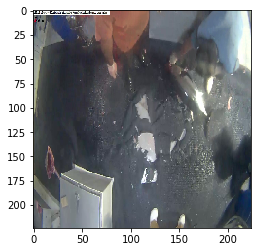

In [16]:
import matplotlib.pyplot as plt

img_path=Allimages['ALB'][0]

plt.figure()
img = image.load_img(img_path, target_size=(224, 224,3))
#converting images to arrays
x = image.img_to_array(img)
print type(x),x.shape
plt.imshow(img)
plt.show()

In [17]:
data=np.load('TrainImageMean_cropped.npz')
I_R=data['I_R']
I_G=data['I_G']
I_B=data['I_B']
print (I_R,I_G,I_B)

def retrainCLF(itr,Xall,Yall):
    
    X_train, X_test, y_train, y_test = train_test_split(Xall, Yall, test_size=0.33, random_state=itr)
    
    print "# Tuning hyper-parameters for %s" % score
    print ""
    clf = GridSearchCV(LinearSVC(C=1), {'C': [1, 10, 100, 1000,10000]}, cv=5,scoring='%s_macro' % 'precision',n_jobs=5)

#     clf = GridSearchCV(SVC(C=1.0, kernel='linear',max_iter=1e5,probability=True,shrinking=True), {'C': [1, 10, 100, 1000,10000]}, cv=5,
#                        scoring='%s_macro' % 'precision',n_jobs=5)


    clf.fit(X_train,  y_train.reshape(1,-1)[0])

    print "Best parameters set found on development set:"
    print 
    print clf.best_params_
    print 
    print "Grid scores on development set:"
    print
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print "%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params) 
    print

    print "Detailed classification report:"
    print
    print "The model is trained on the full development set."
    print "The scores are computed on the full evaluation set."
    print
    y_true, y_pred = y_test, clf.predict(X_test)
    print classification_report(y_true, y_pred)

    dumpname= 'Resnet50'+'_'+'SVC'+'_'+'precision'+str(itr)+'.pkl'
    joblib.dump(clf, os.path.join('models_cropped', dumpname) )
    
    return clf                                                                                          

def CheckOverlap(x0tr,y0tr,x1tr,y1tr,x0,y0,x1,y1):
    # return True if overlapp is good
    # first make sure x0 is min and y0 is min
    if x0tr>x1tr:
        x0tr,x1tr=x1tr,x0tr
    if y0tr>y1tr:
        y0tr,y1tr=y1tr,y0tr
    if x0>x1:
        x0,x1=x1,x0
    if y0>y1:
        y0,y1=y1,y0
    
    if x0<x0tr
    # area of interesection with truth is greater than 70%
    
def doprediction(Xall,Yall,clf,model,img,append2Xall=True):
    if hasattr(clf,'predict_proba')==False:
        def predict_proba(self,X):
            y=np.zeros((1,clf.best_estimator_.coef_.shape[0]))
            ind=clf.predict(X)[0]
            y[0][ind]=1
            return y
        clf.predict_proba=types.MethodType( predict_proba, clf )


    for xind in range(Xall.shape[0]):
        print xind,' of ',Xall.shape[0],'\r',
#         img = image.load_img(img_path, target_size=(224, 224,3))
#         x = image.img_to_array(img)
        x=Xall[xind,:,:,:]
    
        for h in range(50,80,10):
            for w in range(50,80,10):
                for j in range(0,224,10):
                    for i in range(0,224,10):
                        x0=i
                        y0=j
                        x1=x0+w
                        y1=y0+h

                        print h,w,j,i,'\r',
                        if x1>=224 or y1>=224:
                            break

                        
                        immg=image.array_to_img(x[y0:y1,x0:x1,:])
                        immg=immg.resize((224, 224))
                        y = image.img_to_array(immg)
    #                     if you are loading mean extracted then no need to remove mean
    #                     y[:,:,0] = y[:,:,0] - I_R
    #                     y[:,:,1] = y[:,:,1] - I_G
    #                     y[:,:,2] = y[:,:,2] - I_B

                        y = np.expand_dims(y, axis=0)
                        yext=model.predict(y)
                        
                        pp=clf.predict(yext)[0]
                        IoU=
                        if pp == Yall[xind] :
                            print "TP",'\r',

                        else:
                            print "FP ... appending ",xind," ",h," ",'w',' ',j,' ',i,'\r',

(array(96.40368659262118), array(107.12191881841852), array(99.89469193894617))


In [58]:
# Loading initial mean extracted data
data=np.load('MeanRemovedData_cropped.npz')
Xmean=data['Xmean']
Y=data['Y']
Y=Y.astype(int)

Labels=data['Labels']
Ybinary=data['Ybinary']  



In [69]:
if Y[0]==np.array([[7]]):
    print "ok"

ok


inputdata/train/LAG/img_04435.jpg


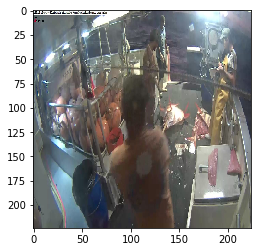

  labels  probs
0    LAG    1.0
1    ALB    0.0
2    BET    0.0
50 70 100 120


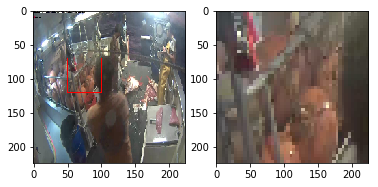

----------------------------------------------------------------------------------------------------
  labels  probs
0    LAG    1.0
1    ALB    0.0
2    BET    0.0
120 70 170 120


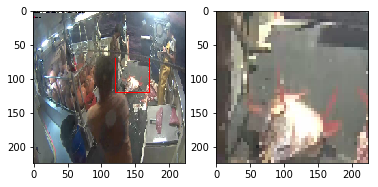

----------------------------------------------------------------------------------------------------
  labels  probs
0    LAG    1.0
1    ALB    0.0
2    BET    0.0
140 70 190 120


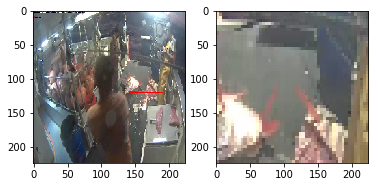

----------------------------------------------------------------------------------------------------
  labels  probs
0    LAG    1.0
1    ALB    0.0
2    BET    0.0
50 80 100 130


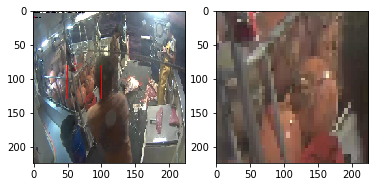

----------------------------------------------------------------------------------------------------


KeyboardInterrupt: 

In [103]:





clf=joblib.load(os.path.join('models_cropped','ResNet50_LinearSVC_recall.pkl') )
model=ResNet50(weights='imagenet')

if hasattr(clf,'predict_proba')==False:
    def predict_proba(self,X):
        y=np.zeros((1,clf.best_estimator_.coef_.shape[0]))
        ind=clf.predict(X)[0]
        y[0][ind]=1
        return y
    clf.predict_proba=types.MethodType( predict_proba, clf )

fish='LAG' 

imageind=40

img_path=Allimages[fish][imageind]
print img_path
img = image.load_img(img_path, target_size=(224, 224,3))
plt.figure()
plt.imshow(img)
plt.show()

height=50
width=70

# height=45
# width=80
L=[]
for h in range(50,80,10):
    for w in range(50,80,10):

        for j in range(0,224,10):
            for i in range(0,224,10):
                x0=i
                y0=j
                x1=x0+w
                y1=y0+h

                print h,w,j,i,'\r',
                if x1>=224 or y1>=224:
                    break

                
                # plt.show()


#                 img = image.load_img(img_path, target_size=(224, 224,3))
                img = image.load_img(img_path)
                x = image.img_to_array(img)
                xmax=x.shape[0]
                ymax=x.shape[1]
#                 print xmax,ymax
                ppbox=copy.deepcopy(All_bboxes[fish][imageind])
                leftcorner=0
                rightcorner=1
                for i in range(len(ppbox)):
                    ppbox[i][leftcorner][0],ppbox[i][leftcorner][1]=ppbox[i][leftcorner][1],ppbox[i][leftcorner][0]
                    ppbox[i][rightcorner][0],ppbox[i][rightcorner][1]=ppbox[i][rightcorner][1],ppbox[i][rightcorner][0]

                    ppbox[i][leftcorner][0]=int( 224*ppbox[i][leftcorner][0]/xmax   ) 
                    ppbox[i][rightcorner][0]=int( 224*ppbox[i][rightcorner][0]/xmax)

                    ppbox[i][leftcorner][1]=int( 224*ppbox[i][leftcorner][1]/ymax    )
                    ppbox[i][rightcorner][1]=int( 224*ppbox[i][rightcorner][1]/ymax )

                
                img=img.resize((224, 224))
                x = image.img_to_array(img)
                immg=image.array_to_img(x[y0:y1,x0:x1,:])
                immg=immg.resize((224, 224))
                img2 = immg.rotate(45).resize((224, 224))

                y = image.img_to_array(immg)
                y[:,:,0] = y[:,:,0] - I_R
                y[:,:,1] = y[:,:,1] - I_G
                y[:,:,2] = y[:,:,2] - I_B
                
                y = np.expand_dims(y, axis=0)
                yext=model.predict(y)
                pp=clf.predict_proba(yext)[0]
#                 print pp
                dp=pd.DataFrame({'probs':pp,'labels':list(DFEC.Labels)})
                dp.sort_values(by='probs',ascending=False,inplace=True)
                dp.index=range(len(dp))
                pp=list(pp)
                pp.append(w)
                pp.append(h)
                pp.append(x0)
                pp.append(y0)
                pp.append(x1)
                pp.append(y1)
                L.append(pp)

                if fish == dp.loc[0,'labels'].tolist() :
                    print dp.loc[0:2,:]
                    print x0,y0,x1,y1
                    fig,ax=plt.subplots(1,2)
                    draw=ImageDraw.Draw(img)
                    draw.rectangle([(x0,y0),(x1,y1)],outline='#ff0000')
                    for trbox in ppbox:
                        draw.rectangle([tuple(trbox[0]),tuple(trbox[1])],outline='#00ff00')
                    del draw
                    ax[0].imshow(img)


                    ax[1].imshow(immg)

            #         fig.suptitle(str( clf.predict_proba(yext)) )
                    plt.show()
                    plt.close()

                    print "-"*100
                    time.sleep(0.1)

dfhist=pd.DataFrame(L,columns=list(DFEC.Labels)+['w','h','x0','y0','x1','y1'])
# fig,ax=plt.subplots(1,1,figsize=(15,10))
# dfhist.hist(stacked=True, bins=np.linspace(0,1,20),ax=ax,normed=True)
# plt.show()

inputdata/train/LAG/img_04435.jpg
(128, 88) (163, 125)


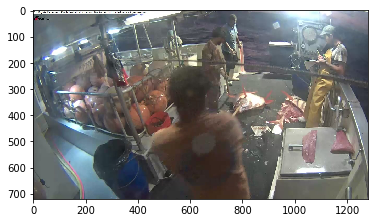

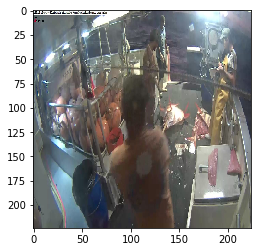

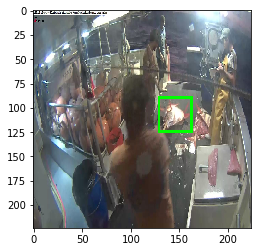

In [123]:

def CustomRescaleBB(img,ppbox):
    
    imgresized=img.resize((224, 224))
    
    ppbox=copy.deepcopy(ppbox)
    x = image.img_to_array(img)
    xmax=x.shape[1]
    ymax=x.shape[0]
    
    leftcorner=0
    rightcorner=1
    for i in range(len(ppbox)):
    #     ppbox[i][leftcorner][0],ppbox[i][leftcorner][1]=ppbox[i][leftcorner][1],ppbox[i][leftcorner][0]
    #     ppbox[i][rightcorner][0],ppbox[i][rightcorner][1]=ppbox[i][rightcorner][1],ppbox[i][rightcorner][0]

        ppbox[i][leftcorner][0]=int( 224*ppbox[i][leftcorner][0]/xmax   ) 
        ppbox[i][rightcorner][0]=int( 224*ppbox[i][rightcorner][0]/xmax)

        ppbox[i][leftcorner][1]=int( 224*ppbox[i][leftcorner][1]/ymax    )
        ppbox[i][rightcorner][1]=int( 224*ppbox[i][rightcorner][1]/ymax )
    
    imgresizedbbox=imgresized.copy()
    draw=ImageDraw.Draw(imgresizedbbox)
    for trbox in ppbox:
        print tuple(trbox[0]),tuple(trbox[1])
        draw.rectangle([tuple(trbox[0]),tuple(trbox[1])],outline='#00ff00')
        trbox[0]=np.array(trbox[0])+1
        trbox[1]=np.array(trbox[1])-1
        draw.rectangle([tuple(trbox[0]),tuple(trbox[1])],outline='#00ff00')
        trbox[0]=np.array(trbox[0])+1
        trbox[1]=np.array(trbox[1])-1
        draw.rectangle([tuple(trbox[0]),tuple(trbox[1])],outline='#00ff00')

    return (img,imgresized,imgresizedbbox)


fish='LAG' 

imageind=40

img_path=Allimages[fish][imageind]
print img_path
img = image.load_img(img_path)

img,imgresized,imgresizedbbox=CustomRescaleBB(img,All_bboxes[fish][imageind])



plt.figure()
plt.imshow(img)
plt.show()

plt.figure()
plt.imshow(imgresized)
plt.show()

plt.figure()
plt.imshow(imgresizedbbox)
plt.show()




In [80]:
All_bboxes[fish][40]

[[[737, 283], [932, 404]]]

720 1280
[[[88, 128], [125, 163]]]


In [99]:
pp

NameError: name 'pp' is not defined

In [41]:
yext.shape

(1, 1000)

In [ ]:
dp=pd.DataFrame(L,columns=list(DFEC.Labels)+['w','h','x0','y0'])
dp['x1']=dp['x0']+dp['w']
dp['y1']=dp['y0']+dp['h']

In [ ]:
S=[]
for x in range(80,80+50,2):
    for y in range(90,90+45,2):
        print x,y,'\r',
#         ds=dp[(dp['x0']<=x) & (x<=dp['x1']) & (dp['y0']<=y) & (y<=dp['y1'])][list(DFEC.Labels)]
#         k=[]
#         for cc in DFEC.Labels:
#             k.append( ds[ds[cc]>=0.3][cc].mean() )
#         S.append( [x,y,DFEC.Labels[np.argmax( np.array(k) )]]  )
        fig,ax=plt.subplots(1,1,figsize=(10,7))
        dfhist.hist(stacked=True, bins=np.linspace(0,1,20),ax=ax,normed=True)
        plt.show()

# ds=pd.DataFrame(S,columns=['x','y','label'])
# ds

In [ ]:
fig,ax=plt.subplots(1,1)
x0=80
y0=90

img = image.load_img(img_path, target_size=(224, 224,3))
draw=ImageDraw.Draw(img)
draw.rectangle([(x0,y0),(x0+50,y0+45)],outline='#ff0000')
del draw
ax.imshow(img)
plt.show()

In [ ]:
img = image.load_img(img_path, target_size=(224, 224,3))
fish='SHARK'
dg=ds[ds['label']==fish][['x','y']]
x0,y0=ds[ds['label']==fish][['x','y']].min().tolist()
x1,y1=ds[ds['label']==fish][['x','y']].max().tolist()
print x0,y0
print x1,y1
fig,ax=plt.subplots(1,1)
for ind in dg.index:
    draw=ImageDraw.Draw(img)
    x0=dg.loc[ind,'x']
    y0=dg.loc[ind,'y']
    draw.rectangle([(x0,y0),(x0+2,y0+2)],outline='#ff0000')
    del draw
ax.imshow(img)
plt.show()

In [ ]:
ds

In [ ]:
plt.figure()
img = cv2.imread(img_path,1)
img = cv2.resize(img, (224, 224), cv2.INTER_LINEAR).astype(np.uint8)
# img = img.transpose((1,0,2))
# im = np.expand_dims(im, axis=0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print type(img),img.shape
plt.imshow(img[:100,:100,:])
# plt.imshow(x)
plt.show()

# //w=187,h=76

In [ ]:
y=Y.reshape(1,-1)[0]
Xmean[y==0,:,:,:].shape

In [ ]:
data=np.load('MeanRemovedData_cropped.npz')
Xmean=data['Xmean']
Y=data['Y']
Y=Y.astype(int)

Labels=data['Labels']
Ybinary=data['Ybinary']

datagen = ImageDataGenerator(
        rotation_range=90,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

y=Y.reshape(1,-1)[0]
classsizes=[]
for i in range(0,len(np.unique(y))):
    classsizes.append(len(y[y==i]))

classsizes=np.array(classsizes)
mxsz=1.3*max(classsizes)
meansz=1.3*np.mean(classsizes)
for clsind in range(len(classsizes)):
    print 
    iters= int( (mxsz-classsizes[clsind])/20 ) 
    for batch in datagen.flow(Xmean[y==clsind,:,:,:],Y[y==clsind], batch_size=20):
        Xmean=np.vstack((Xmean,batch[0]) )
        Y=np.vstack((Y, batch[1] ) )
        
        iters=iters-1
        print clsind,classsizes[clsind],mxsz,iters,'\r',
        if iters==0:
            break


In [ ]:
del Xmean
gc.collect()

In [ ]:
y=DFEC.Y.reshape(1,-1)[0]
classsizes=[]
labels=np.unique(y)
for cls in labels:
    classsizes.append(len(y[y==cls]))
print DFEC.Labels
classsizes